# Improving Fashion MNIST with Convolutions 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train = (X_train_full[:50000] / 255.0).reshape(50000, 28, 28, 1)
y_train = y_train_full[:50000] 
X_valid = (X_train_full[50000:] / 255.0).reshape(10000, 28, 28, 1)
y_valid = y_train_full[50000:]

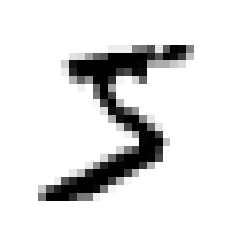

In [4]:
plt.imshow(X_train[0].reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs = {}):
        if logs.get('accuracy') > 0.998:
            print('Over 99.8 accuracy reached, stopping training')
            self.model.stop_training = True

In [8]:
save_best_model_callback = tf.keras.callbacks.ModelCheckpoint('model/MNIST_conv.h5', save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10)
accuracy_callback = AccuracyCallback()

In [9]:
model.compile(
    loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy']
)

In [10]:
model.fit(
    X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
    callbacks=[early_stopping_callback, accuracy_callback, save_best_model_callback]
)

Epoch 1/100
1563/1563 [==============================] - 47s 29ms/step - loss: 0.1478 - accuracy: 0.9534 - val_loss: 0.0516 - val_accuracy: 0.9845
Epoch 2/100
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0466 - val_accuracy: 0.9860
Epoch 3/100
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.0514 - val_accuracy: 0.9862
Epoch 4/100
1563/1563 [==============================] - 46s 30ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0351 - val_accuracy: 0.9908
Epoch 5/100
1563/1563 [==============================] - 46s 30ms/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0474 - val_accuracy: 0.9885
Epoch 6/100
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0178 - accuracy: 0.9947 - val_loss: 0.0417 - val_accuracy: 0.9886
Epoch 7/100
1563/1563 [==============================] - 47s 30ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 18.3082 - accuracy: 0.9867


[18.30820655822754, 0.9866999983787537]